# Conditional Sampling

#### Implement Gibbs Sampling for a multidim gaussian generative joint, by using the conditionals which are also gaussian distributions . The minimum requirement is for joint to have D=2 variables and for Gibbs to alternate between the two.

In [1]:
import numpy as np
import random
from matplotlib.ticker import NullFormatter
import matplotlib.pyplot as plt
np.random.seed(1234)

In [2]:
num_samples = 1000

In [3]:
mu = np.array([5,5])
cov = np.array([[1,0.9],[0.8, 0.2]])

In [4]:
x = np.zeros((num_samples,2))

In [5]:
def gibbs(mu, cov):
    i = 1
    while i < num_samples:
        x[i][0] = np.random.normal(mu[0] + cov[1][0]*(x[i-1][0] - mu[1]), np.sqrt(1 - np.square(cov[1][0])))
        x[i][1] = np.random.normal(mu[1] + cov[0][1]*(x[i-1][0] - mu[0]), np.sqrt(1 - np.square(cov[0][1])))
        i += 1

In [6]:
gibbs(mu, cov)

In [7]:
x

array([[ 0.        ,  0.        ],
       [ 1.2828611 , -0.01913427],
       [ 2.88591306,  1.51829319],
       ...,
       [ 5.09985052,  4.45794475],
       [ 5.28902806,  5.36560025],
       [ 6.43925152,  5.60075703]])

In [8]:
def scatter_hist(x, y):
    nullfmt = NullFormatter()         # no labels

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(1, figsize=(8, 8))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # the scatter plot:
    axScatter.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
    lim = (int(xymax/binwidth) + 1) * binwidth

    axScatter.set_xlim((-lim, lim))
    axScatter.set_ylim((-lim, lim))

    bins = np.arange(-lim, lim + binwidth, binwidth)
    axHistx.hist(x, bins=bins)
    axHisty.hist(y, bins=bins, orientation='horizontal')

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())

    plt.show()

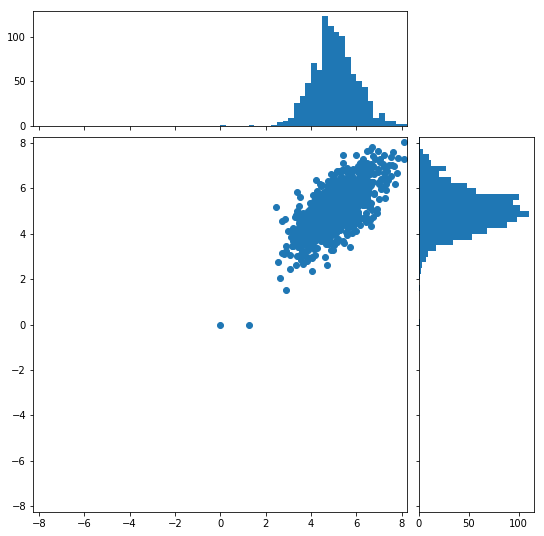

In [9]:
scatter_hist(x[:,0], x[:,1])

In [10]:
og_data = np.random.multivariate_normal(mu, cov, 1000)

C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


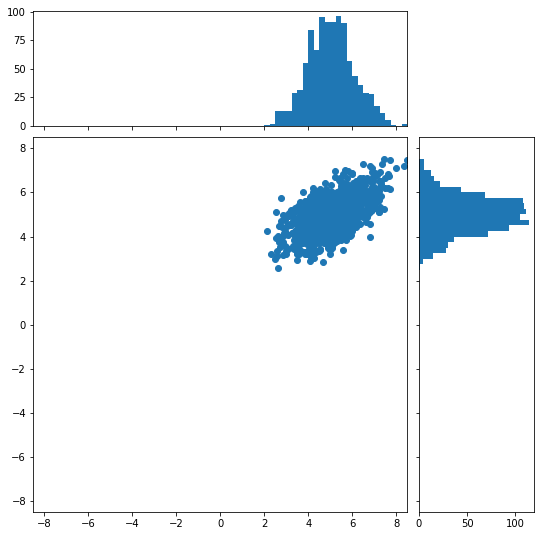

In [12]:
scatter_hist(og_data[:,0], og_data[:,1])